In [1]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 4.000
Column: 1, Selected False, Rank: 5.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected False, Rank: 3.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected False, Rank: 2.000


In [75]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from imblearn.over_sampling import SMOTE 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_excel('Preprocessed.xlsx')
X = df.drop('Degree of Injury', axis=1)
y = df['Degree of Injury']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
#Preprocessed 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)
X_sm.shape

(5928, 9)

In [77]:
#train and test set division
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

In [78]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1)
# fit RFE
rfe.fit(X_train, y_train)
# summarize all features
for i in range(X_train.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 8.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected False, Rank: 6.000
Column: 3, Selected False, Rank: 2.000
Column: 4, Selected False, Rank: 3.000
Column: 5, Selected False, Rank: 4.000
Column: 6, Selected False, Rank: 5.000
Column: 7, Selected False, Rank: 7.000
Column: 8, Selected False, Rank: 9.000


Accuracy = 0.90
Recall = 0.91



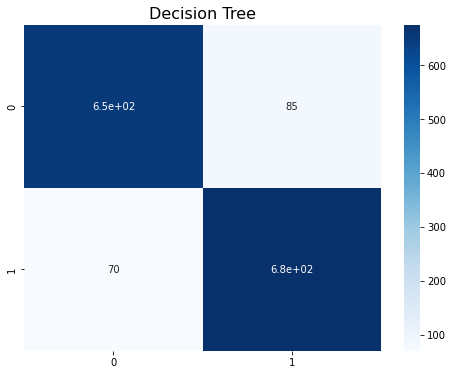

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

model = DecisionTreeClassifier(max_depth=10,min_samples_leaf=23)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Decision Tree', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

>2 0.867 (0.012)
>3 0.886 (0.010)
>4 0.878 (0.014)
>5 0.878 (0.012)
>6 0.878 (0.011)
>7 0.873 (0.013)
>8 0.873 (0.013)
>9 0.871 (0.016)


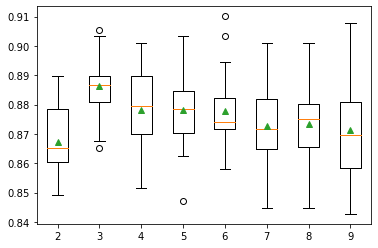

In [80]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
 

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 10):
		rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
		model = DecisionTreeClassifier()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [94]:
# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(max_depth=10,min_samples_leaf=23), n_features_to_select=3)
model = DecisionTreeClassifier(max_depth=10,min_samples_leaf=23)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.888 (0.013)


Accuracy = 0.89
Recall = 0.89



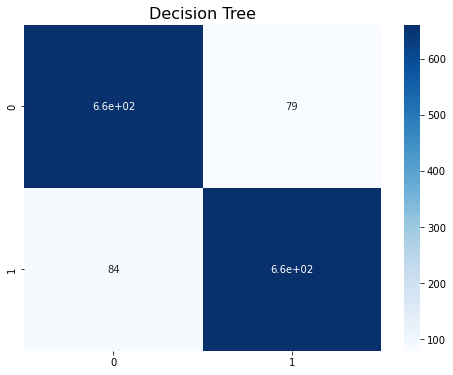

In [110]:
#3,4variables,hyperparametertuning
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=3)
dtpipeline = Pipeline(steps=[('s',rfe),('m',DecisionTreeClassifier(max_depth=10,min_samples_leaf=23))]).fit(X_train,y_train)
preds= dtpipeline.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Decision Tree', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

Accuracy = 0.87
Recall = 0.85



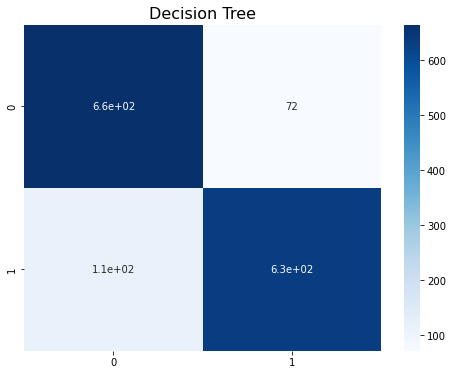

In [109]:
#5variables,hyperparametertuning
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=9)
dtpipeline = Pipeline(steps=[('s',rfe),('m',DecisionTreeClassifier())]).fit(X_train,y_train)
preds= dtpipeline.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Decision Tree', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

Accuracy = 0.88
Recall = 0.86



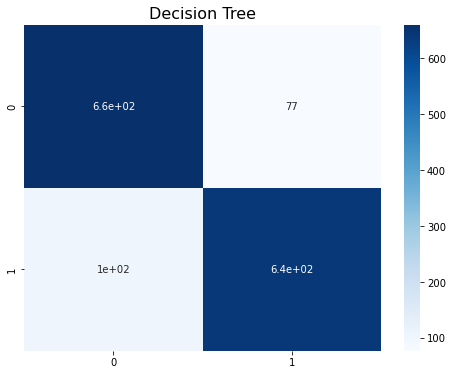

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

model = RandomForestClassifier(max_depth=10,min_samples_leaf=23)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Decision Tree', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

Accuracy = 0.89
Recall = 0.88



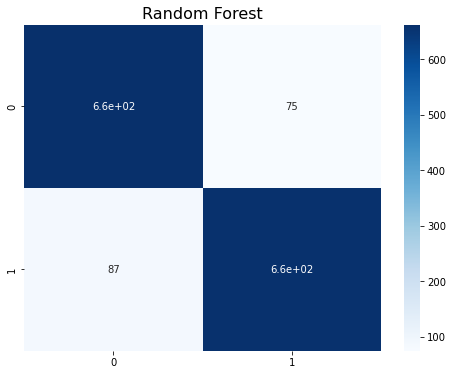

In [115]:


    


model = RandomForestClassifier(bootstrap= False, max_features = 'sqrt', min_samples_leaf = 4,n_estimators = 6, random_state = 42)
model.fit(X_train, y_train)
preds= model.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Random Forest', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');